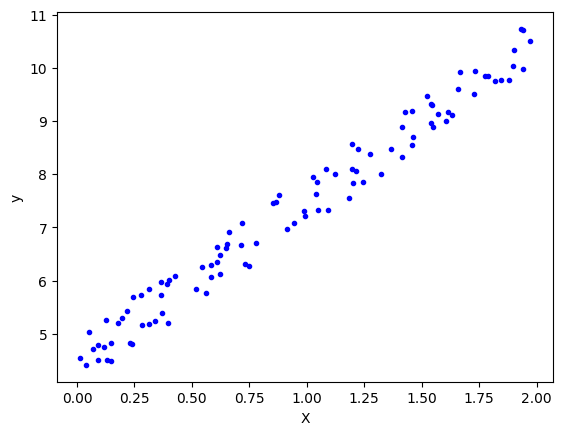

In [17]:
# create random data points to apply linear regression to
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.rand(m, 1)
plt.plot(X, y, 'b.')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [18]:
# compute the regression normal to obtain the optimal coefficients
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
theta_best

array([[4.51359766],
       [2.98323418]])

In [19]:
# perform the normal calc quicker by using the pseudoinv, which factors the X portion of the normal formula
theta_best = np.linalg.pinv(X_b) @ y
theta_best

array([[4.51359766],
       [2.98323418]])

In [20]:
# predict an output given the learned coefficients
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)
y_predict = X_new_b @ theta_best
y_predict

array([[ 4.51359766],
       [10.48006601]])

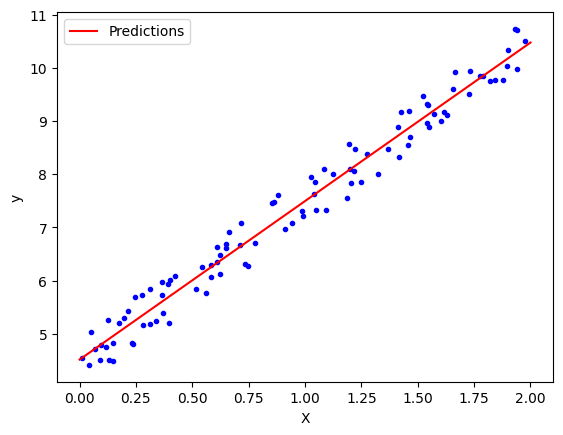

In [27]:
# plot the regression prediction line
plt.plot(X, y, 'b.')
plt.plot(X_new, y_predict, 'r-', label='Predictions')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [22]:
# perform the linear regression with the sklearn tools
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(f'intercept: {lin_reg.intercept_}')
print(f'coef: {lin_reg.coef_}')
print(f'X_new prediction: {lin_reg.predict(X_new)}')

intercept: [4.51359766]
coef: [[2.98323418]]
X_new prediction: [[ 4.51359766]
 [10.48006601]]


In [28]:
# use the lstsq() function directly that uses SVD, on which LinearRegression() is based
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.51359766],
       [2.98323418]])

In [29]:
# implement a quick batch gradient descent to compute the optimal theta
eta = 0.1
n_epochs = 1000
m = len(X_b)

np.random.seed(42)
theta = np.random.rand(2, 1)

for epoch in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)
    theta -= eta * gradients

theta

array([[4.51359766],
       [2.98323418]])